In [7]:
from skimage import io,transform
import os

BASE_DIR = os.path.join('/work/george','DAVIS')
IMAGESETS = os.path.join('ImageSets','480p')
RESIZE_HEIGHT = 56
RESIZE_WIDTH = 56

def read_label(labelFile) :
    maskFile = BASE_DIR + labelFile
    mask = io.imread(maskFile,as_grey=True)
        
    # Resize 
    mask = transform.resize(mask,[RESIZE_HEIGHT,RESIZE_WIDTH])
        
    #io.imshow(mask)
        
    return mask

In [8]:
def diff(label_file1,label_file2):
    label1 = read_label(label_file1)
    label2 = read_label(label_file2)
    
    return label1 - label2

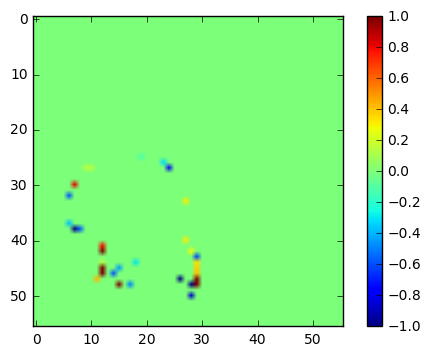

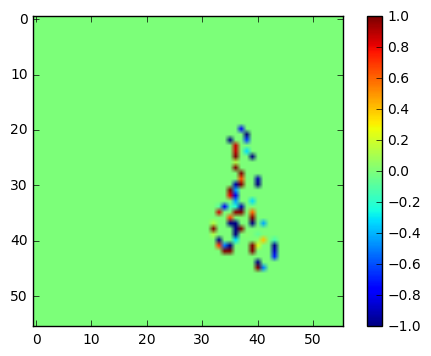

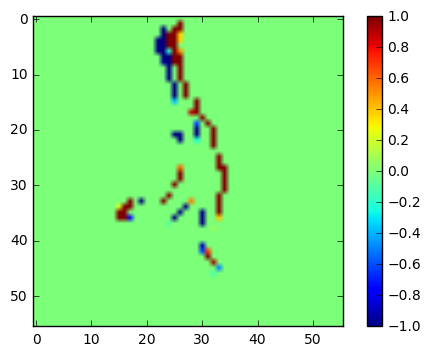

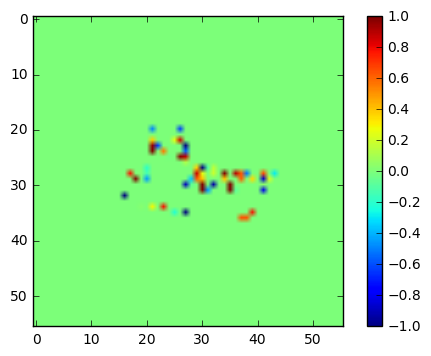

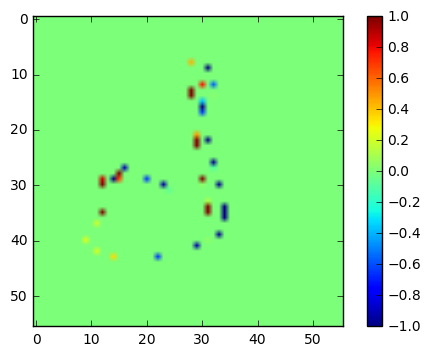

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

label_list = [['/Annotations/480p/bear/00002.png' ,'/Annotations/480p/bear/00003.png'],
['/Annotations/480p/bmx-bumps/00084.png' ,'/Annotations/480p/bmx-bumps/00085.png'],
           ['/Annotations/480p/breakdance-flare/00001.png', '/Annotations/480p/breakdance-flare/00002.png'],
           ['/Annotations/480p/boat/00006.png','/Annotations/480p/boat/00007.png' ],
           ['/Annotations/480p/blackswan/00005.png', '/Annotations/480p/blackswan/00006.png' ]]
for image_no in range(len(label_list)):
    diff_img = diff(label_list[image_no][0],label_list[image_no][1])
    plt.figure()
    
    plt.imshow(diff_img)
    plt.colorbar()